In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [21]:
picture = cv.imread('leaf.png',0)
ret,threshold1 = cv.threshold(picture,232,255,cv.THRESH_BINARY)

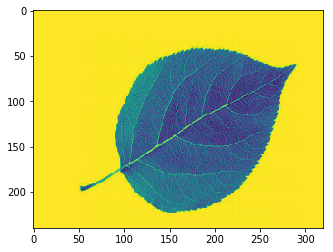

In [22]:
plt.imshow(picture)

In [23]:
picture.shape

(240, 320)

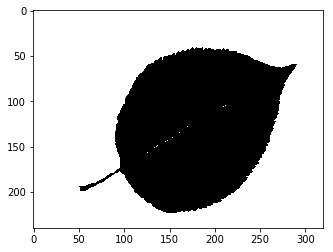

In [24]:
plt.imshow(threshold1,'gray')

In [25]:
threshold1.shape

(240, 320)

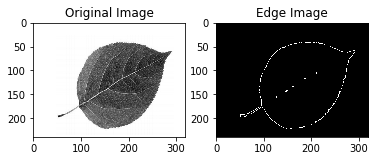

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
picture = cv2.imread('leaf.png',0)
edges = cv2.Canny(threshold1,100,200)

plt.subplot(121),plt.imshow(picture,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')

plt.show()

In [27]:
for i, row in enumerate(edges):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(41, 174) 255


In [28]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if edges[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if edges[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

In [30]:
print(count)
print(chain)

97
[3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 1, 0, 7, 7, 7, 7, 7, 7, 6, 7, 7, 0, 7, 6, 6, 7, 7, 7, 6, 7, 7, 7, 0, 6, 6, 7, 7, 7, 6, 6, 5, 1, 0, 6, 5, 1, 0, 6, 6, 7, 6, 7, 6, 7, 7, 7, 6, 6, 6, 5, 1, 1, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 2, 4, 3, 3, 2, 3, 3, 3, 2, 2]
